# Import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
column_types = df.dtypes

print("Columns and their data types:")
print(column_types)


Columns and their data types:
job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


# Missing values

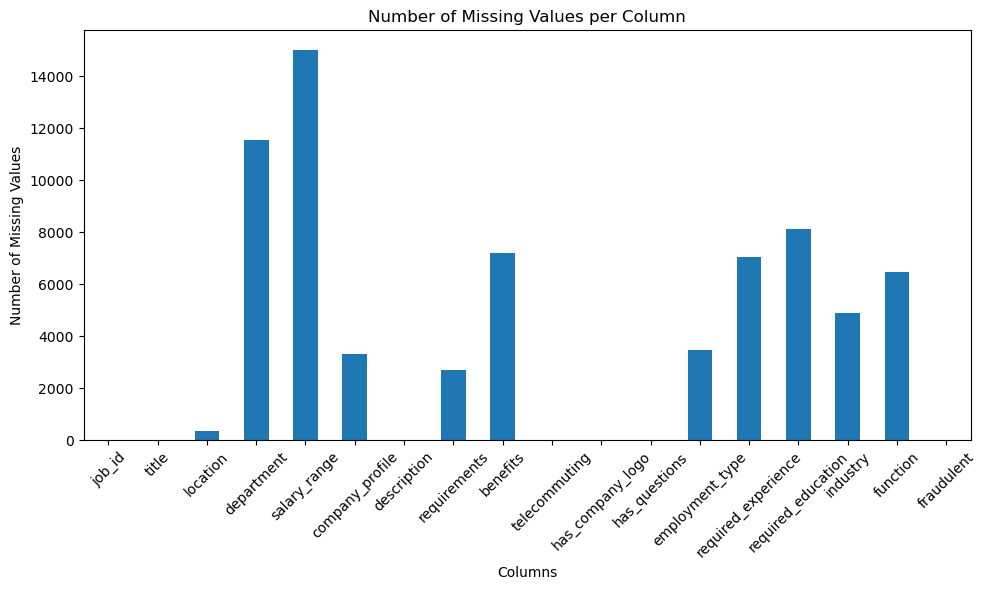

In [5]:
missing_values = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values.plot(kind='bar')

# Customize the plot
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Ensures labels fit within the figure area
plt.show()

In [6]:
df.fillna(' ', inplace=True)

In [7]:
df.shape

(17880, 18)

# Distribution of Target Class

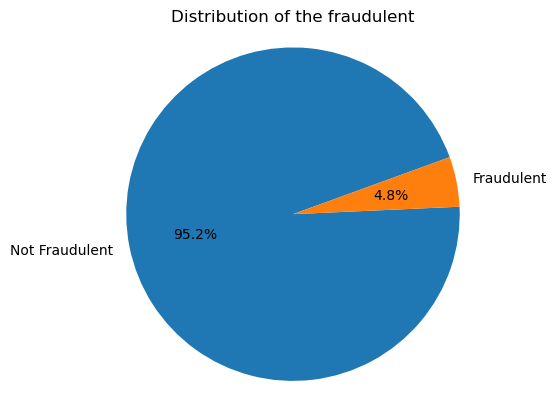

In [8]:
# Count ocurrences of different category in fraudulent column
fraudulent_counts = df['fraudulent'].value_counts()

# Plot pie chart
plt.pie(fraudulent_counts, labels=['Not Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=20)

# titles
plt.title('Distribution of the fraudulent')
plt.axis('equal')
plt.show()

# Fraudulent cases on required employment types. 


<Figure size 1200x600 with 0 Axes>

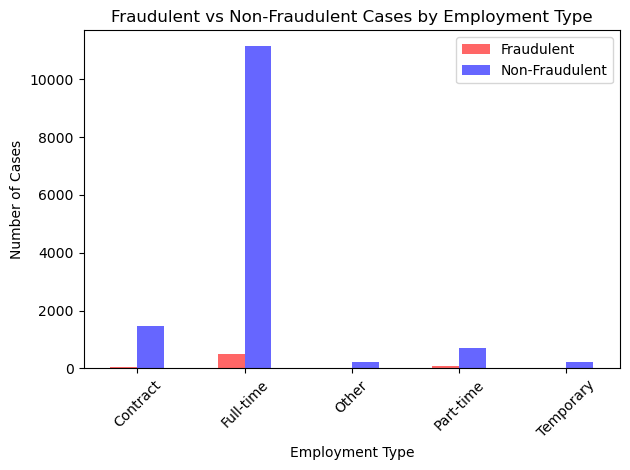

In [9]:
# Create a copy of the DataFrame for plotting purposes
plot_df = df.copy()

# Remove rows where 'employment_type' is blank
plot_df = plot_df[plot_df['employment_type'].str.strip() != '']

# Count occurrences of each employment type for fraudulent and non-fraudulent cases
employment_fraud = plot_df[plot_df['fraudulent'] == 1]['employment_type'].value_counts()
employment_non_fraud = plot_df[plot_df['fraudulent'] == 0]['employment_type'].value_counts()

# Combine the two series into a DataFrame for plotting and fill NaNs with 0
employment_data = pd.DataFrame({
    'Fraudulent': employment_fraud,
    'Non-Fraudulent': employment_non_fraud
}).fillna(0)

# Remove rows where both 'Fraudulent' and 'Non-Fraudulent' are 0
employment_data = employment_data[(employment_data['Fraudulent'] != 0) | (employment_data['Non-Fraudulent'] != 0)]

# Plotting
plt.figure(figsize=(12, 6))
employment_data.plot(kind='bar', color=['red', 'blue'], alpha=0.6)
plt.title('Fraudulent vs Non-Fraudulent Cases by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

# Fraudulent cases on  required Experience

<Figure size 1200x600 with 0 Axes>

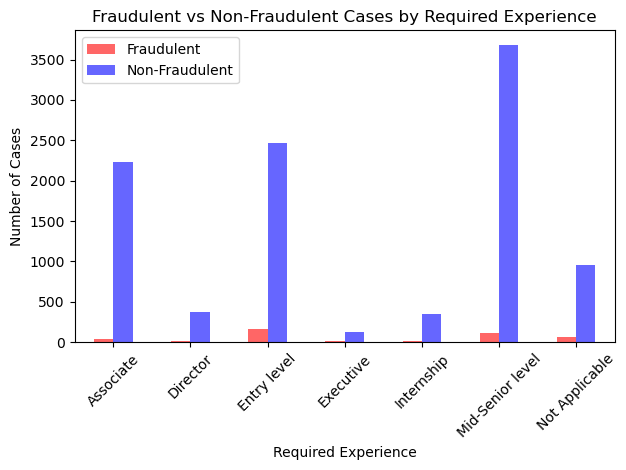

In [10]:
plot_df = plot_df[plot_df['required_experience'].str.strip() != '']

# Count occurrences of each required experience for fraudulent and non-fraudulent cases
experience_fraud = plot_df[plot_df['fraudulent'] == 1]['required_experience'].value_counts()
experience_non_fraud = plot_df[plot_df['fraudulent'] == 0]['required_experience'].value_counts()

# Combine the two series into a DataFrame for plotting and fill NaNs with 0
experience_data = pd.DataFrame({
    'Fraudulent': experience_fraud,
    'Non-Fraudulent': experience_non_fraud
}).fillna(0)

# Remove rows where both 'Fraudulent' and 'Non-Fraudulent' are 0
experience_data = experience_data[(experience_data['Fraudulent'] != 0) | (experience_data['Non-Fraudulent'] != 0)]

# Plotting
plt.figure(figsize=(12, 6))
experience_data.plot(kind='bar', color=['red', 'blue'], alpha=0.6)
plt.title('Fraudulent vs Non-Fraudulent Cases by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

# Top 10 Frequent cases of fraudulent in industry 


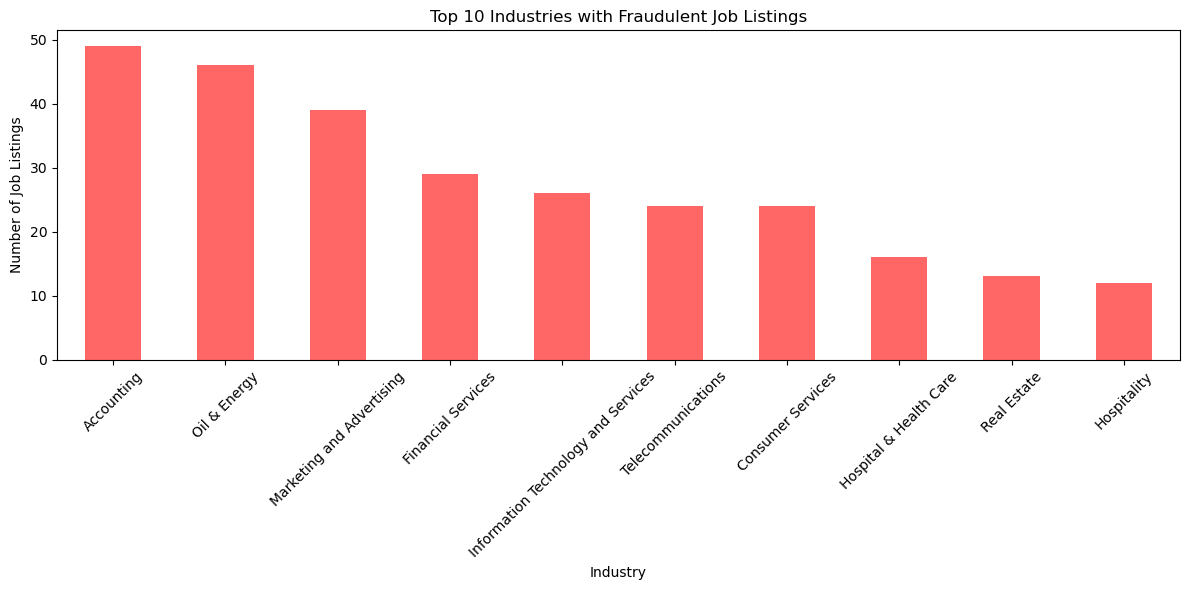

In [11]:
# Create a copy of the DataFrame for plotting purposes
plot_df = plot_df[plot_df['industry'].str.strip() != '']

# Filter to include only fraudulent job listings
fraudulent_df = plot_df[plot_df['fraudulent'] == 1].copy()  # Make a copy to avoid SettingWithCopyWarning

# Clean and preprocess industry data (if needed)
fraudulent_df['industry'] = fraudulent_df['industry'].fillna('').apply(lambda x: str(x).strip())

# Count occurrences of each industry for fraudulent cases
industry_counts = fraudulent_df['industry'].value_counts().head(10)  # Adjust the number as needed for top 10

# Plotting
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='red', alpha=0.6)
plt.title('Top 10 Industries with Fraudulent Job Listings')
plt.xlabel('Industry')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

# Top 10 functions with cases of fraudulent in function

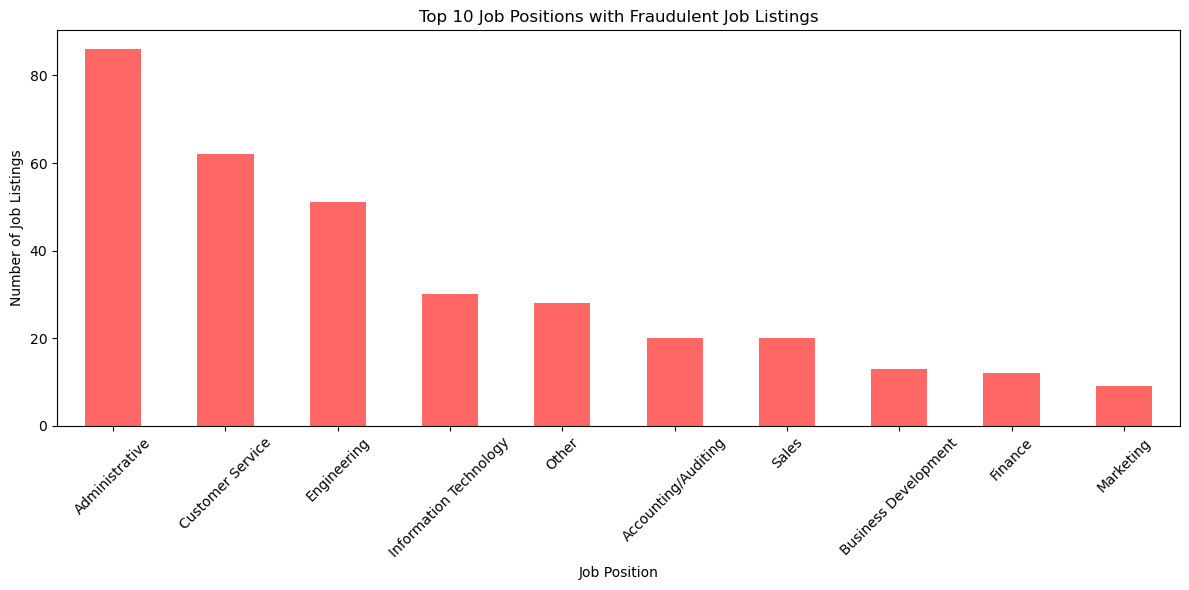

In [12]:
# Create a copy of the DataFrame for plotting purposes
plot_df = plot_df[plot_df['function'].str.strip() != '']

# Filter to include only fraudulent job listings
fraudulent_df = plot_df[plot_df['fraudulent'] == 1].copy()  # Make a copy to avoid SettingWithCopyWarning

# Clean and preprocess function data (if needed)
fraudulent_df['function'] = fraudulent_df['function'].fillna('').apply(lambda x: str(x).strip())

# Remove rows where 'function' is blank
fraudulent_df = fraudulent_df[fraudulent_df['function'] != '']

# Count occurrences of each function for fraudulent cases
function_counts = fraudulent_df['function'].value_counts().head(10)  # Adjust the number as needed for top 10

# Plotting
plt.figure(figsize=(12, 6))
function_counts.plot(kind='bar', color='red', alpha=0.6)
plt.title('Top 10 Job Positions with Fraudulent Job Listings')
plt.xlabel('Job Position')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

# Formatting Data

In [13]:
df['concatenate_text']= df['title']+" " +  df['department'] + " " + df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits'] + " "

In [14]:
clean_df = df[['concatenate_text', 'fraudulent']].copy()
clean_df

,concatenate_text,fraudulent
0,"Marketing Intern Marketing We're Food52, and w...",0
1,Customer Service - Cloud Video Production Succ...,0
2,Commissioning Machinery Assistant (CMA) Valo...,0
3,Account Executive - Washington DC Sales Our pa...,0
4,Bill Review Manager SpotSource Solutions LLC...,0
...,...,...
17875,Account Director - Distribution Sales Vend is...,0
17876,Payroll Accountant Accounting WebLinc is the e...,0
17877,Project Cost Control Staff Engineer - Cost Con...,0
17878,Graphic Designer Nemsia Studios is looking...,0


In [15]:
import os

In [16]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'cleaned_data.csv'

# Check if the file already exists
if not os.path.exists(csv_file_path):
    # Save the DataFrame to a CSV file
    clean_df.to_csv(csv_file_path, index=False)
    print(f"CSV file saved successfully to '{csv_file_path}'")
else:
    print(f"CSV file '{csv_file_path}' already exists, skipping saving process.")

CSV file 'cleaned_data.csv' already exists, skipping saving process.


# Data Cleanning

In [17]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

C:\Users\Timot\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
stop_words = stopwords.words("English")
wn1 = WordNetLemmatizer()

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

In [20]:
clean_df['concatenate_text'] = clean_df['concatenate_text'].apply(clean_text)


In [21]:
def tokenise_and_lemmatize(text): 
    # Tokenize text 
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [wn1.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [22]:
clean_df['concatenate_text'] = clean_df['concatenate_text'].apply(tokenise_and_lemmatize)

In [23]:
clean_df

,concatenate_text,fraudulent
0,marketing intern marketing food weve created g...,0
1,customer service cloud video production succes...,0
2,commissioning machinery assistant cma valor se...,0
3,account executive washington dc sale passion i...,0
4,bill review manager spotsource solution llc gl...,0
...,...,...
17875,account director distribution sale vend lookin...,0
17876,payroll accountant accounting weblinc ecommerc...,0
17877,project cost control staff engineer cost contr...,0
17878,graphic designer nemsia studio looking experie...,0


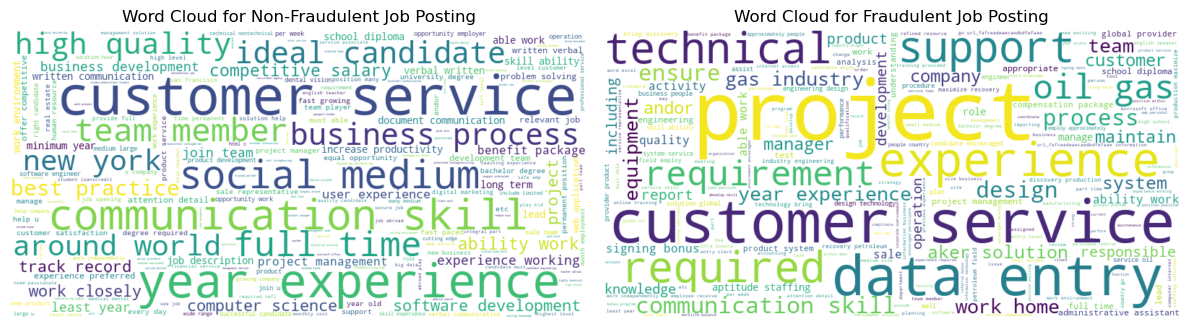

In [24]:
from wordcloud import WordCloud

# Filter job descriptions based on fraudulent status
non_fraudulent_text = " ".join(clean_df[clean_df['fraudulent'] == 0]['concatenate_text'])
fraudulent_text = " ".join(clean_df[clean_df['fraudulent'] == 1]['concatenate_text'])

# Create word clouds
wordcloud_non_fraudulent = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_text)
wordcloud_fraudulent = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # subplot 1 for non-fraudulent
plt.imshow(wordcloud_non_fraudulent, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Posting')
plt.axis('off')

plt.subplot(1, 2, 2)  # subplot 2 for fraudulent
plt.imshow(wordcloud_fraudulent, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Posting')
plt.axis('off')

plt.tight_layout()
plt.show()


# Split Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [26]:
Target_variable = 'fraudulent'
target = clean_df[Target_variable]

In [27]:
# Setting the proportion of the dataset to be allocated for testing
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(clean_df['concatenate_text'],
                                                    target,
                                                    test_size=test_size, 
                                                    random_state=42,
                                                    stratify=target)

# Feature Extraction 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
# Apply Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data using SMOTE
Xsmote, ysmote = smote.fit_resample(X_train_tfidf, y_train)

# Establish Baseline

In [32]:
Frequency = clean_df.groupby([Target_variable])[Target_variable].count()
Frequency

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [33]:
# Naive_baseline is determined by the ratio of majority class to the total instances
naive_baseline = Frequency.iloc[0] / Frequency.sum()
naive_baseline

0.9515659955257271

# Traditional Model Training

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
nb_classifier = MultinomialNB()
nb_classifier.fit(Xsmote, ysmote)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(Xsmote, ysmote)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(Xsmote, ysmote)

KNeighborsClassifier()

In [36]:
y_predNB = nb_classifier.predict(X_test_tfidf)
y_predDT = dt_classifier.predict(X_test_tfidf)
y_predKNN = knn_classifier.predict(X_test_tfidf)

# Naive Bayes
print("Accuracy for using Naive Bayes:", accuracy_score(y_test, y_predNB))
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_predNB))

# Decision Tree
print("Accuracy using Decision Tree:", accuracy_score(y_test, y_predDT))
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_predDT))

# KNN
print("Accuracy using KNN:", accuracy_score(y_test, y_predKNN))
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_predKNN))

Accuracy for using Naive Bayes: 0.9633668903803132

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3403
           1       0.58      0.91      0.71       173

    accuracy                           0.96      3576
   macro avg       0.79      0.94      0.84      3576
weighted avg       0.97      0.96      0.97      3576

Accuracy using Decision Tree: 0.9616890380313199

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.59      0.71      0.64       173

    accuracy                           0.96      3576
   macro avg       0.79      0.84      0.81      3576
weighted avg       0.97      0.96      0.96      3576

Accuracy using KNN: 0.7508389261744967

Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      0.74     

# Hypertunning Traditional Models

In [37]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(classifier, param_grid, Xsmote, ysmote, X_test_tfidf, y_test):
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

    # Fit GridSearchCV on the resampled training data
    grid_search.fit(Xsmote, ysmote)

    # Print best parameters and best score
    print(f"Best parameters for {classifier.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_}")

    # Evaluate on test set
    y_pred = grid_search.predict(X_test_tfidf)
    print(f"\nAccuracy on test set for {classifier.__class__.__name__}: {accuracy_score(y_test, y_pred)}")
    print(f"\nClassification Report for {classifier.__class__.__name__} after hyperparameter tuning:")
    print(classification_report(y_test, y_pred))
    
    # Return the best estimator
    return grid_search.best_estimator_ 

In [38]:
# Parameter grids for different classifiers
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
param_grid_dt = {'max_depth': [None, 5, 10, 15, 20],
                 'min_samples_split': [2, 5, 10]}
param_grid_knn = {'n_neighbors': [3, 5],                  
                  'metric': ['euclidean', 'manhattan']}
# Perform grid search and get the best model for Naive Bayes
best_nb_classifier = perform_grid_search(MultinomialNB(), param_grid_nb, Xsmote, ysmote, X_test_tfidf, y_test)

# Perform grid search and get the best model for Decision Tree
best_dt_classifier = perform_grid_search(DecisionTreeClassifier(), param_grid_dt, Xsmote, ysmote, X_test_tfidf, y_test)

# Perform grid search and get the best model for K-Nearest Neighbors
best_knn_classifier = perform_grid_search(KNeighborsClassifier(), param_grid_knn, Xsmote, ysmote, X_test_tfidf, y_test)


Best parameters for MultinomialNB: {'alpha': 0.1}
Best CV score: 0.9903387019618402

Accuracy on test set for MultinomialNB: 0.9821029082774049

Classification Report for MultinomialNB after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.78      0.88      0.83       173

    accuracy                           0.98      3576
   macro avg       0.89      0.93      0.91      3576
weighted avg       0.98      0.98      0.98      3576

Best parameters for DecisionTreeClassifier: {'max_depth': None, 'min_samples_split': 5}
Best CV score: 0.9746531104917319

Accuracy on test set for DecisionTreeClassifier: 0.9614093959731543

Classification Report for DecisionTreeClassifier after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.58      0.72      0.64       173

    accuracy             

# Saving Traditional Models

In [65]:
import joblib 

joblib.dump(best_dt_classifier, 'Models/decision_tree_model.pkl')
joblib.dump(best_knn_classifier, 'Models/knn_model.pkl')
joblib.dump(best_nb_classifier, 'Models/naive_bayes_model.pkl')
joblib.dump(vectorizer, 'Models/tfidf_vectorizer.pkl')


['Models/tfidf_vectorizer.pkl']

# BERT Model Training

In [40]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [42]:
def BERTmodel(epochs, batch_size):
    # Define BERT layers
    bert_encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-4-h-512-a-8/2")
    bert_preprocess = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")
    
    # Input layer
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = bert_preprocess(text_input)
    outputs = bert_encoder(preprocessed_text)
    
    # Neural network layers
    l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
    l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
    
    # Construct model
    model = tf.keras.Model(inputs=[text_input], outputs=[l])
    

    METRICS = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=METRICS)
    
    return model

In [43]:
# Define hyperparameters
batch_size = 32
EPOCHS = 5

# Early stopping setup
monitor = 'val_loss'
patience = 3
early_stop = tf.keras.callbacks.EarlyStopping(monitor=monitor, restore_best_weights=True, patience=patience, verbose=1)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
# Create and train the model
model = BERTmodel(epochs=EPOCHS, batch_size=batch_size)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=EPOCHS,
                    batch_size=batch_size,
                    callbacks=[early_stop])

Epoch 1/5
358/358 [==============================] - 442s 1s/step - loss: 0.1879 - accuracy: 0.9457 - precision: 0.1000 - recall: 0.0124 - val_loss: 0.1550 - val_accuracy: 0.9549 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
358/358 [==============================] - 429s 1s/step - loss: 0.1628 - accuracy: 0.9509 - precision: 0.5366 - recall: 0.0389 - val_loss: 0.1507 - val_accuracy: 0.9581 - val_precision: 0.6818 - val_recall: 0.1172
Epoch 3/5
358/358 [==============================] - 447s 1s/step - loss: 0.1569 - accuracy: 0.9516 - precision: 0.5797 - recall: 0.0708 - val_loss: 0.1428 - val_accuracy: 0.9577 - val_precision: 0.7059 - val_recall: 0.0938
Epoch 4/5
358/358 [==============================] - 407s 1s/step - loss: 0.1528 - accuracy: 0.9538 - precision: 0.6957 - recall: 0.1133 - val_loss: 0.1422 - val_accuracy: 0.9567 - val_precision: 0.6429 - val_recall: 0.0703
Epoch 5/5
358/358 [==============================] - 488s 1s/step - loss: 0.1510 - accuracy: 0.9

In [52]:
# Evaluate the final model
accuracy = model.evaluate(X_test, y_test)
print(f"BERT model accuracy on test set: {accuracy[1]:.3f}")

# Predict using the BERT model on the test set
y_pred_bert = model.predict(X_test)

# Convert predicted probabilities to binary predictions using a threshold of 0.5
y_pred_bert = np.where(y_pred_bert > 0.5, 1, 0)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_bert))

112/112 [==============================] - 219s 2s/step - loss: 0.1436 - accuracy: 0.9553 - precision: 0.6857 - recall: 0.1387
BERT model accuracy on test set: 0.955
112/112 [==============================] - 226s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.69      0.14      0.23       173

    accuracy                           0.96      3576
   macro avg       0.82      0.57      0.60      3576
weighted avg       0.94      0.96      0.94      3576



# Hypertuning Bert Model

In [46]:
from sklearn.utils import shuffle
# Define the parameter grid including epochs and batch_size
param_grid = {
    'epochs': [3, 5],  # Fewer epochs for initial tuning
    'batch_size': [16, 32, 64]
}

# Create the model
modelClassifier = KerasClassifier(build_fn=BERTmodel, verbose=0)

# Define the subset size
subset_size = 500  # Adjust this value as needed

# Shuffle the data
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Take the first 500 samples after shuffling
X_train_subset = X_train_shuffled[:subset_size]
y_train_subset = y_train_shuffled[:subset_size]

# Perform grid search on the subset
grid = GridSearchCV(estimator=modelClassifier, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train_subset, y_train_subset)

cv_results = grid_result.cv_results_

# Print initial results
print("\nInitial grid search results on subset:")
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print(f"Mean score: {mean_score:.3f}, Parameters: {params}")

# Best parameters from subset tuning
best_params = grid_result.best_params_
print("Best parameters from subset:", best_params)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\Timot\AppData\Local\Temp\ipykernel_22996\3124941765.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelClassifier = KerasClassifier(build_fn=BERTmodel, verbose=0)



Initial grid search results on subset:
Mean score: 0.952, Parameters: {'batch_size': 16, 'epochs': 3}
Mean score: 0.952, Parameters: {'batch_size': 16, 'epochs': 5}
Mean score: 0.952, Parameters: {'batch_size': 32, 'epochs': 3}
Mean score: 0.952, Parameters: {'batch_size': 32, 'epochs': 5}
Mean score: 0.952, Parameters: {'batch_size': 64, 'epochs': 3}
Mean score: 0.952, Parameters: {'batch_size': 64, 'epochs': 5}
Best parameters from subset: {'batch_size': 16, 'epochs': 3}


# Retrain Bert Model with hyperparameters

In [47]:
# Use the best parameters from the subset search for the full dataset search
final_param_grid = {
    'epochs': [best_params['epochs']],
    'batch_size': [best_params['batch_size']]
}

# Initialize the model with the best hyperparameters
final_model = BERTmodel(epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Train the final model on the full dataset
final_history = final_model.fit(X_train, y_train, 
                                validation_data=(X_val, y_val), 
                                epochs=best_params['epochs'], 
                                batch_size=best_params['batch_size'], 
                                callbacks=[early_stop])

Epoch 1/3
716/716 [==============================] - 1064s 1s/step - loss: 0.1776 - accuracy: 0.9495 - precision: 0.3556 - recall: 0.0283 - val_loss: 0.1521 - val_accuracy: 0.9556 - val_precision: 0.6667 - val_recall: 0.0156
Epoch 2/3
716/716 [==============================] - 884s 1s/step - loss: 0.1587 - accuracy: 0.9525 - precision: 0.6410 - recall: 0.0885 - val_loss: 0.1447 - val_accuracy: 0.9581 - val_precision: 0.6667 - val_recall: 0.1250
Epoch 3/3
716/716 [==============================] - 872s 1s/step - loss: 0.1545 - accuracy: 0.9528 - precision: 0.6374 - recall: 0.1027 - val_loss: 0.1408 - val_accuracy: 0.9574 - val_precision: 0.6667 - val_recall: 0.0938


# Test Bert Final Optimize Model

In [48]:
# Evaluate the final model
final_accuracy = final_model.evaluate(X_test, y_test)
print(f"BERT Final model accuracy on test set: {final_accuracy[1]:.3f}")

# Print the classification report
y_pred_bert = final_model.predict(X_test)
y_pred_bert = np.where(y_pred_bert > 0.5, 1, 0)
print("Classification Report:")
print(classification_report(y_test, y_pred_bert))

112/112 [==============================] - 204s 2s/step - loss: 0.1478 - accuracy: 0.9544 - precision: 0.7083 - recall: 0.0983
BERT Final model accuracy on test set: 0.954
112/112 [==============================] - 213s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.71      0.10      0.17       173

    accuracy                           0.95      3576
   macro avg       0.83      0.55      0.57      3576
weighted avg       0.94      0.95      0.94      3576



# Save BERT Model

In [59]:
final_model.save('Models/bert_model.h5')

# Ensemble Learning Training

In [60]:
from sklearn.linear_model import LogisticRegression

y_pred_nb = best_nb_classifier.predict(X_test_tfidf)
y_pred_dt = best_dt_classifier.predict(X_test_tfidf)
y_pred_knn = best_knn_classifier.predict(X_test_tfidf)

# Stack predictions horizontally to create meta-features
stacking_features = np.column_stack((y_pred_nb, y_pred_dt, y_pred_knn, y_pred_bert))

# Split meta-features into training and validation sets
X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(stacking_features, y_test, test_size=0.2, random_state=42)

# Initialize and train the meta-model
stacking_model = LogisticRegression()
stacking_model.fit(X_train_stack, y_train_stack)

# Predict on the validation set
y_val_stack_pred = stacking_model.predict(X_val_stack)

# Evaluate the meta-model
from sklearn.metrics import classification_report, accuracy_score
print("Meta-Model Classification Report:")
print(classification_report(y_val_stack, y_val_stack_pred))
print(f"Meta-Model Accuracy: {accuracy_score(y_val_stack, y_val_stack_pred):.3f}")


Meta-Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       684
           1       0.72      0.91      0.81        32

    accuracy                           0.98       716
   macro avg       0.86      0.95      0.90       716
weighted avg       0.98      0.98      0.98       716

Meta-Model Accuracy: 0.980


# Ensemble Learning Test

In [62]:
# Test Model
y_test_stack_pred = stacking_model.predict(stacking_features)
print("Final Stacking Ensemble Classification Report:")
print(classification_report(y_test, y_test_stack_pred))
print(f"Final Stacking Ensemble Accuracy: {accuracy_score(y_test, y_test_stack_pred):.3f}")

Final Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.80      0.87      0.83       173

    accuracy                           0.98      3576
   macro avg       0.90      0.93      0.91      3576
weighted avg       0.98      0.98      0.98      3576

Final Stacking Ensemble Accuracy: 0.983


# Save Ensemble Learning Stacking Model

In [64]:
# Load the Stacking Model
joblib.dump(stacking_model, 'Models/stacking_model.pkl')
print("Stacking Model have been saved successfully.")

Stacking Model have been saved successfully.
